# "Tutorial 09: Measure of Central Tendency: Ungrouped Data"
> "Central Tendency for Ungrouped Data"

- toc: true 
- badges: true
- comments: true
- categories: [basic-stats]
- sticky_rank: 9
- search_exclude: true
- hide: true

In [80]:
#collapse-hide
## required packages/modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.patches as patches
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
import matplotlib.font_manager as fm
from IPython.display import display, HTML

## default font style
rcParams["font.family"] = "serif"

## format output
CSS = """
.output {
  margin-left:30;
}
"""

HTML('<style>{}</style>'.format(CSS))

class FontManager:
    """Utility to load fun fonts from https://fonts.google.com/ for matplotlib.
    Find a nice font at https://fonts.google.com/, and then get its corresponding URL
    from https://github.com/google/fonts/. Lazily downloads the fonts.


    The FontManager is taken from the ridge_map package by Colin Carroll (@colindcarroll).

    Parameters
    ----------
    url : str, default is the url for Roboto-Regular.ttf
        Can really be any .ttf file, but probably looks like
        'https://github.com/google/fonts/blob/master/ofl/cinzel/static/Cinzel-Regular.ttf?raw=true'
        Note make sure the ?raw=true is at the end.

    Examples
    --------
    font_url = 'https://github.com/google/fonts/blob/master/ofl/abel/Abel-Regular.ttf?raw=true'
    fm = FontManager(url=font_url)
    fig, ax = plt.subplots()
    ax.text("Good content.", fontproperties=fm.prop, size=60)
    """

    def __init__(self,
                 url=('https://github.com/google/fonts/blob/master/'
                      'apache/roboto/static/Roboto-Regular.ttf?raw=true'),
                 style='normal'):
        self.url = url
        with NamedTemporaryFile(delete=False, suffix=".ttf") as temp_file:
            temp_file.write(urlopen(self.url).read())
            self._prop = fm.FontProperties(fname=temp_file.name, style=style)

    @property
    def prop(self):
        """Get matplotlib.font_manager.FontProperties object that sets the custom font."""
        return self._prop

    def __repr__(self):
        return f'{self.__class__.__name__}(font_url={self.url})'
    
fm = FontManager("https://github.com/google/fonts/blob/master/apache/roboto/static/Roboto-Regular.ttf?raw=true")

# Introduction 

* A **measure of central tendency** is a summary statistic that represents the centre value of a dataset.

* These measures indicate where most values in a distribution fall. In statistics, the three most common measures of central tendency are:
<ol>
    <li>Mean</li>
    <li>Median</li>
    <li>Mode</li>
</ol>

* If we have a dataset of test scores for a particular class, the measures of central tendency can yield information such as *the average test-score*, *the middle test-score*, and *the most frequently occurring test-score*.

> Note: Measures of central tendency do not focus on the span of the dataset or how far values are from the middle numbers. The central tendency of a distribution represents only one characteristic of a distribution i.e. the center value.

# Mean

* The **mean** is the *arithmetic average of a group of observations* (or numbers).

* It is computed by summing all the observations and dividing by the total number of observations.

* The population mean is represented by the Greek letter mu ($\mu$), and the sample mean is represented by $\overline{x}$.

* The formulae for computing the population mean and the sample mean are given below:
    
    * Population Mean: $\mu = \frac{\Sigma x}{N} = \frac{x_{1} + x_{2} + x_{3} + .. + x_{N}}{N}$
    
    * Sample Mean: $\overline{x} = \frac{\Sigma x}{n} = \frac{x_{1} + x_{2} + x_{3} + .. + x_{n}}{n}$
    
* Let's break down the formulae:
    
    * The capital Greek letter *sigma*($\Sigma$) is commonly used in mathematics to represent a summation of all the numbers in a grouping. 

    * *N* is the number of observations in the population, and *n* is the number of observation in the sample.

## Example

**Example 01:** The number of U.S. cars in service by top car rental companies in a recent year according to Auto Rental News follows.

|Company|Number of Cars in Service|
|:-|-:|
|Enterprise|643,000|
|Hertz|327,000|
|National/Alamo|233,000|
|Avis|204,000|
|Dollar/Thrifty|167,000|
|Budget|144,000|
|Advantage|20,000|
|U-Save|12,000|
|Payless|10,000|
|ACE|9,000|
|Fox|9,000|
|Rent-A-Wreck|7,000|
|Triangle|6,000|

Compute the mean.

* **Solution:**

Here we have a total of 12 observations, so *N=13*. 

$\mu = $ $\frac{643000 + 327000 + 233000 + 204000 + 167000 + 144000 + 20000 + 12000 + 10000 + 9000 + 9000 + 7000 + 6000}{13}$ 

$\mu = $ $\frac{1791000}{13}$ = $137769.23$

* Let's look how we can do the same in Python.

In [2]:
#collapse-hide
mean_ = np.mean(
    a=[
        643000, 327000, 233000, 204000, 167000, 144000, 
        20000, 12000, 10000, 9000, 9000, 7000, 6000
    ]
)

print(f"Mean = {round(mean_, 2)}")

Mean = 137769.23


## The Outlier Problem

* **What is an outlier?**
    
    * *Outliers* are the data points that are far from the other data points, i.e. they're unusual/unexpected values in a distribution. 

    * e.g. in the scores 10, 25, 27, 29, 31, 34, 50 both 10 and 50 are "outliers".

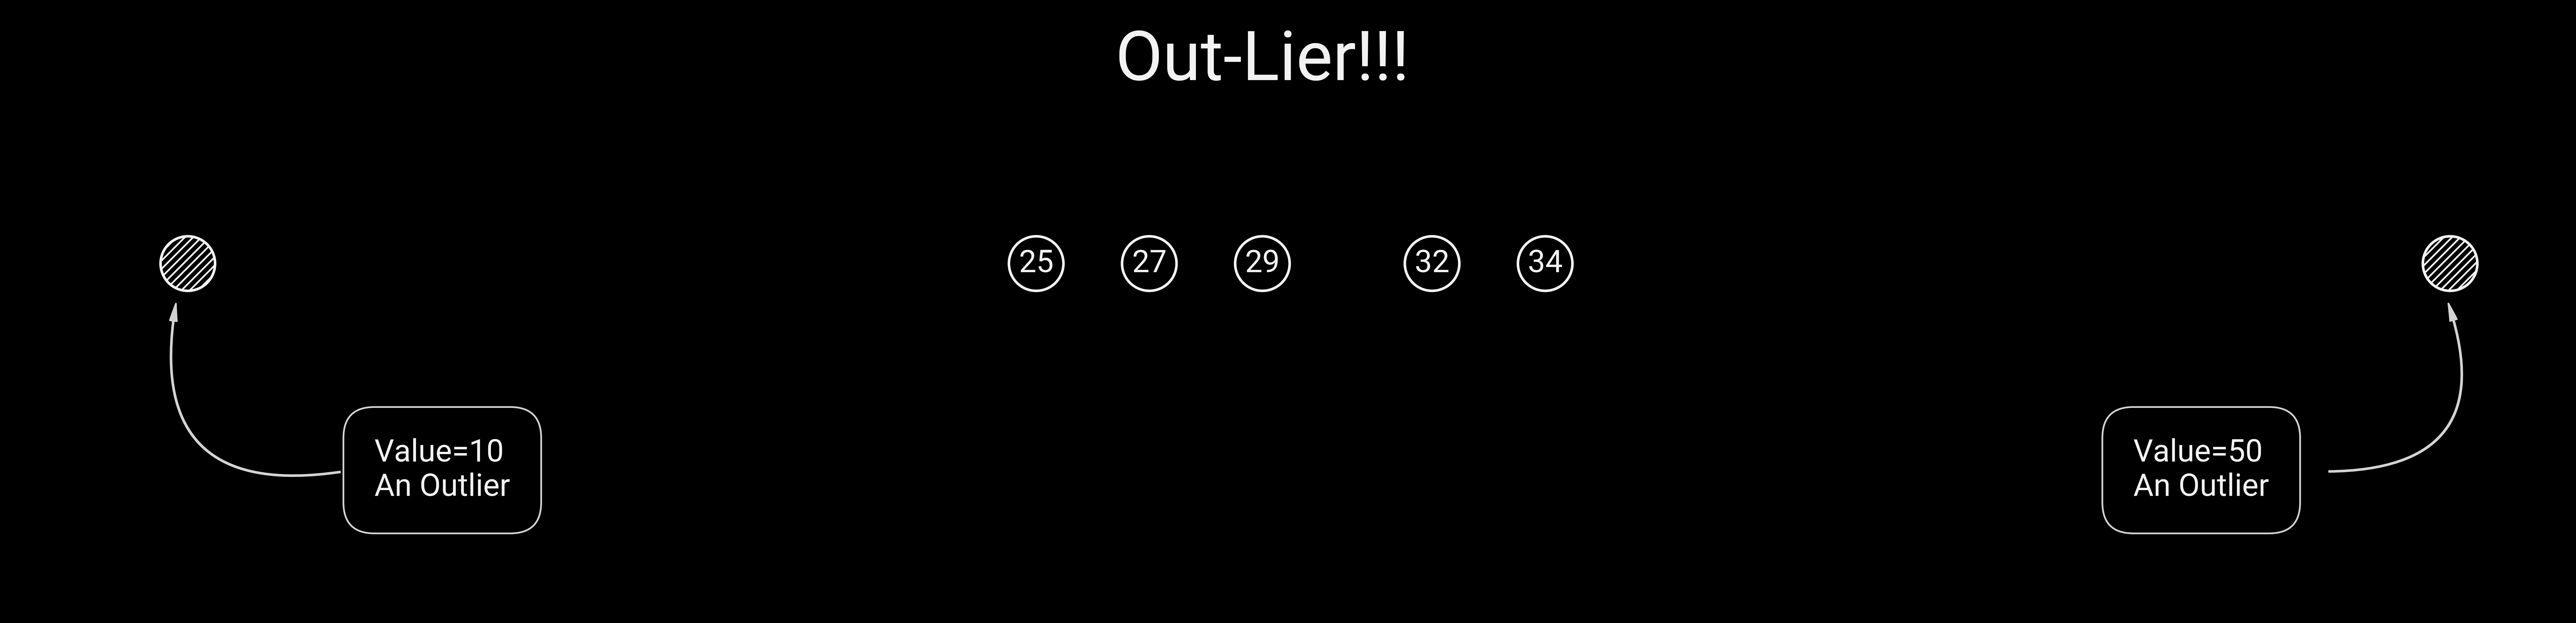

In [81]:
#collapse-hide
# make subplots
fig, ax = plt.subplots(figsize=(26, 6), facecolor="black", dpi=600)
ax.set_facecolor("black")

# scatter points
ax.scatter(
    x=[25, 29, 32, 34, 27],
    y=[5]*5, s=1000, lw=1.5,
    fc="none", ec="#F2F2F2"
)

# scatter outlier
ax.scatter(
    [10, 50], [5, 5], s=1000, fc="none", ec="#F2F2F2", hatch=5*'/', zorder=1, lw=1.5,
)

# add text
for i in [25, 29, 32, 34, 27]:
    t = ax.text(
        i, 5, i, color="#F2F2F2", 
        ha="center", va="center", 
        size=18, zorder=3, fontproperties=fm.prop
    )
    
# style for arrows
style = "Simple, tail_width=0.5, head_width=4, head_length=10"
kw = dict(arrowstyle=style, color="#D3D3D3")

# plot arrow for outlier
a1 = patches.FancyArrowPatch(
    (12.75, 4.915), (9.8, 4.985), connectionstyle="arc3,rad=-.7", **kw
)
ax.add_patch(a1)

# plot arrow for outlier
a1 = patches.FancyArrowPatch(
    (47.8, 4.915), (49.95, 4.985), connectionstyle="arc3,rad=.7", **kw
)
ax.add_patch(a1)

# add text
ax.text(
    13.3, 4.905, "Value=10\nAn Outlier", color="#F2F2F2", size=18,
    bbox=dict(facecolor="none", edgecolor="#D3D3D3", boxstyle="round,pad=1"), 
    zorder=2, fontproperties=fm.prop
)

# add text
ax.text(
    44.4, 4.905, "Value=50\nAn Outlier", color="#F2F2F2", size=18,
    bbox=dict(facecolor="none", edgecolor="#D3D3D3", boxstyle="round,pad=1"), 
    zorder=2, fontproperties=fm.prop
)

# add title
ax.text(
    29, 5.075, "Out-Lier!!!", 
    size=40, color="#F2F2F2",
    ha="center", fontproperties=fm.prop
)

# set axis
ax.set(ylim=(4.87, 5.1))

plt.show()

## Properties of Mean

* **Property 01:** In a distribution, *minimum-value* $\leq$ *mean* $\leq$ *maximum-value*

* **Property 02:** Mean of *equal valued* elements is equal to the element value.
    
    * e.g. if we have the following distribution: 10, 10, 10. The mean will be equal to $\frac{10 + 10 + 10}{3} = 10$ which is equal to the element value itself, i.e. 10
    
* **Property 03:** Given the mean ($\mu$) and total number of observation ($N$) of a distribution, we can find the total sum of all the numbers in the distribution by using the following formula.
    
    * $\Sigma x = \mu * N$
    
    * e.g. Let's say we have a distribution having mean($\mu$) = 4 and total number of observations(N) = 9, to compute the sum of all the numbers in the distribution use the above formula.
    
    * $\Sigma x = \mu * N = 4 * 9 = 36$
    
* **Property 04:** If a distribution $x_{1}$, $x_{2}$, $x_{3}$, ..., $x_{N}$ has $\mu$ as its mean and we increment each number in the distribution by a value $k$, the mean of the new distribution will be $\mu + k$.
    
    * e.g. Let's say we have the following distribution: 7, 3, 5, 2, 9, 4, 1, 2, 3.
    
    * The mean ($\mu_{1}$) $= \frac{7 + 3 + 5 + 2 + 9 + 4 + 1 + 2 + 3}{9} = 4$
    
    * If we increment each number in the above distribution by *k=2*. The new distribution becomes: 9, 5, 7, 4, 11, 6, 3, 4, 5.
    
    * The mean of new distribution ($\mu_{2}$) $= \frac{9 + 5 + 7 + 4 + 11 + 6 + 3 + 4 + 5}{9} = 6$
    
    * Or it can be easily calculated by the formula in *Property 03*. 
        
        * So, $\mu_{2} = \mu_{1} + k = 4 + 2 = 6$
        
* **Property 05:** If a distribution $x_{1}$, $x_{2}$, $x_{3}$, ..., $x_{N}$ has $\mu$ as its mean and we multiply each number in the distribution by a value $k$, the mean of the new distribution will be $\mu * k$.
    
    * e.g. Let's say we have the following distribution: 7, 3, 5, 2, 9, 4, 1, 2, 3.
    
    * The mean ($\mu_{1}$) $= \frac{7 + 3 + 5 + 2 + 9 + 4 + 1 + 2 + 3}{9} = 4$
    
    * If we multiply each number in the above distribution by *k=2*. The new distribution becomes: 14, 6, 10, 4, 18, 8, 2, 4, 6.
    
    * The mean of new distribution ($\mu_{2}$) $= \frac{14 + 6 + 10 + 4 + 18 + 8 + 2 + 4 + 6}{9} = 8$
    
    * Or it can be easily calculated by the formula in *Property 04*. 
        
        * So, $\mu_{2} = \mu_{1} * k = 4 * 2 = 8$
        
* **Property 06:** If we have two distribution, first having *N* elements and a mean of $\mu_{N}$, and second having *M* elements and a mean of $\mu_{M}$, then the mean of $M + N$ elements is:
    
    * $\mu_{N + M} = \frac{(N * \mu_{N}) + (M * \mu_{M})}{N + M}$
    
    * e.g. Let's say our first distribution (N=9) looks like this: 7, 3, 5, 2, 9, 4, 1, 2, 3. ($\mu_{N} = 4$)
    
    * And our second distribution (M=7) looks like this: 4, 6, 5, 4, 1, 3, 2. ($\mu_{M} = 3.57$)
    
    * To calculate the mean for both the distribution combined we can use the above formula.
    
    * $\mu_{N + M} = \frac{(9 * 4) + (7 * 3.57)}{9 + 7} = 3.81$
    
* **Property 07:** If in a given distribution with a mean value $\mu$, we add a new number greater than the mean-value ($\mu$), then our mean will increase otherwise it will decrease. The new mean can be calculated by the following formula.

    * $\mu_{new} = \mu + \frac{x_{N + 1} - \mu}{N + 1}$, where $x_{N + 1}$ is the newly added number.

    * e.g. Let's say we have the following distribution: 7, 3, 5, 2, 9, 4, 1, 2, 3. The mean of this given distribution is 4.
    
    * **Case 01:** If we add a number, to this distribution, which is greater then the mean itself then the new mean will increase. Let's say we added 6 to this distribution. Now the new mean can be calculate by the above formula.
    
        * $\mu_{new} = 4 + \frac{6 - 4}{10} = 4.2$
    
        * 4.2 is the new mean when 6 is added to the distribution and since 6 is greater than the original mean value (which is 4), our new mean(4.2) has increased.

    * **Case 02:** If we add a number, to the original distribution, which is smaller than the mean itself then the new mean will decrease. Let's say we added 2 to the original distribution. Now the new mean can be calculate by the above given formula.
        
        * $\mu_{new} = 4 + \frac{2 - 4}{10} = 3.8$
    
        * 3.8 is the new mean when 2 is added to the original distribution and since 2 is smaller than the original mean value (which is 4), our new mean(3.8) has decreased.
        
    * **Case 03:** If we add a number, to the original distribution, which is equal to the mean itself then the mean remains the same. Let's say we added 4 to the original distribution. Now the new mean can be calculate by the above given formula.
        
        * $\mu_{new} = 4 + \frac{4 - 4}{10} = 4$
    
        * 4 is the new mean when 4 is added to the original distribution and since 4 is equal to the original mean value, our mean value remains the same.

* **Property 08:** If in a given distribution with a mean value $\mu$, we remove a number from the distribution which is greater than the mean-value ($\mu$), then our new mean will decrease otherwise it will increase. The new mean can be calculated by the following formula.

    * $\mu_{new} = \frac{(\mu * N) - k}{N - 1}$, where $N$ is total number of observation in the original distribution and $k$ is the number removed from the distribution.
    
    * e.g. Let's say we have the following distribution: 7, 3, 5, 2, 9, 4, 1, 2, 3. The mean of this given distribution is 4.
    
    * **Case 01:** If we remove a number from the original distribution which is greater than the mean-value, then our new mean will decrease. Let's say we removed 7 from the original distribution, the new mean will be calculated by the above formula.
        
        * $\mu_{new} = \frac{(4 * 9) - 7}{9 - 1} = \frac{29}{8} = 3.625$
        
        * 3.625 is the new mean and is smaller than the original mean value (which is 4).
        
    * **Case 02:** If we remove a number from the original distribution which is smaller than the mean-value, then our new mean will increase. Let's say we removed 3 from the original distribution, the new mean will be calculated by the above formula.
        
        * $\mu_{new} = \frac{(4 * 9) - 3}{9 - 1} = \frac{33}{8} = 4.125$
        
        * 4.125 is the new mean and is greater than the original mean value (which is 4).

    * **Case 03:** If we remove a number from the original distribution which is equal to the mean-value, then our new mean will remain the same. Let's say we removed 4 from the original distribution, the new mean will be calculated by the above formula.
        
        * $\mu_{new} = \frac{(4 * 9) - 4}{9 - 1} = \frac{32}{8} = 4$
        
        * 4 is the new mean and is equal to the original mean value.

* **Property 09:** If we replace a number in the distribution by a larger number then the new-mean will increase, and if we replace the number by a smaller number then the new-mean will decrease. The new men can be calculated by the following formula.
    
    * $\mu_{new} = \mu + \frac{k - o}{N}$, where *k* is the new number and *o* is the original number which is replaced by the new number *k*.
    
    * e.g. Let's say we have the following distribution: 7, 3, 5, 2, 9, 4, 1, 2, 3. The mean of this given distribution is 4.
    
    * **Case 01:** If we replace the number in the distribution by a larger number then the average will increase. Let's say we replace number *5* by the number *7*. The new distribution will look like this: 7, 3, 7, 2, 9, 4, 1, 2, 3.
        
        * The mean of the new distribution can be calculated by using the above given formula, here $k=7$ and $o=5$.
        
        * $\mu_{new} = 4 + \frac{7 - 5}{9} = 4.22$
        
    * **Case 02:** If we replace the number in the distribution by a smaller number then the average will decrease. Let's say we replace number *5* by the number *3*. The new distribution will look like this: 7, 3, 3, 2, 9, 4, 1, 2, 3.
        
        * The mean of the new distribution can be calculated by using the above given formula, here $k=3$ and $o=5$.
        
        * $\mu_{new} = 4 + \frac{3 - 5}{9} = 3.77$